In [2]:
import numpy as np
import tables
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from phd.satellite.single_processing import load_splitting_likelihood_factory
from scipy.optimize import minimize
import importlib
import phd.satellite.processing.likelihood as lh_mod
import phd.satellite.processing.single_processing as sp

In [2]:
importlib.reload(sp)
importlib.reload(lh_mod)

<module 'phd.satellite.processing.likelihood' from '/home/zelenyy/npm/phd/phd-code/python/phd/satellite/processing/likelihood.py'>

In [ ]:
# Реальная геометрия

In [2]:
path = "/home/zelenyy/data/satellite/mean_mesh.hdf5"
splitting = [4 for i in range(20)]
lh_split = load_splitting_likelihood_factory(path, particle="proton", splitting=splitting)




In [3]:
event = np.array([lh_split.interpolators_mean[i]([0.7, 0.6, 0.0])[0] for i in range(20)])

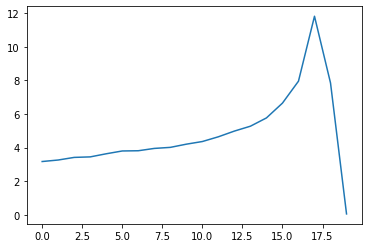

In [25]:
event = np.array([lh_split.interpolators_mean[i]([0.99, 0.585, 0.0])[0] for i in range(20)])
plt.plot(event)

In [20]:
print(lh_split.theta_normilizer.unnormalize(0.585))
lh_split.energy_normilizer.unnormalize(0.7)
event.sum()

0.19999999999998863


15.569270190919763

In [4]:
detector = sp.DetectorCharacter(aperture=30, proton_treshold=4.0, proton_high=100)

proccesor = sp.SingleProcessing(lh_split, detector)

In [5]:
proccesor.process(event)

     fun: 0.0
     jac: array([0., 0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 26
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.97736079, 0.4038252 , 0.06731225])

In [13]:
likelihood = lh_split.build(event)

In [7]:
x = np.linspace(0, 1.0, 7)


In [8]:
lh_grid = []
for i in x:
    for j in x:
        for k in x:
           lh_grid.append(likelihood(np.array([i,j,k])))
lh_grid = np.array(lh_grid)


In [14]:
lh_grid = []
x = np.linspace(0, 1.0, 300)
for i in x:
    lh_grid.append(likelihood(np.array([0.7,i,0.0])))
lh_grid = np.array(lh_grid)

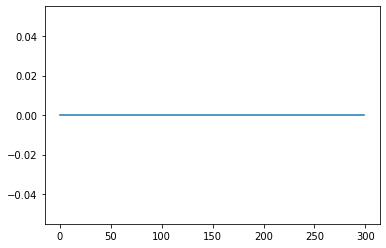

In [11]:
plt.plot(lh_grid)



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_test = pd.read_hdf('/home/zelenyy/storage/data/sri-satellite/testProton/testEvents.hdf5')

In [6]:
res = pd.read_hdf('test_process.hdf5')

In [7]:
indx_theta = (res.theta < np.pi/3) & (df_test.shift != 30.0)
indx = pd.notnull(res.energy) * indx_theta
box_data = []
for i in range(100):
    temp = res.energy[1000*i:1000*(i+1)][indx[1000*i:1000*(i+1)]]
    if i==0:
        box_data.append(temp.values)
    else:
        indx1 = temp != 1.
        box_data.append(temp[indx1])

/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


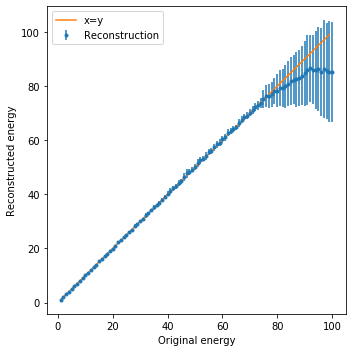

In [11]:
mean = []
std = []
for it in box_data:
    mean.append(it.mean())
    std.append(it.std())

plt.subplots(figsize=(5,5))
energy = range(1,101)
plt.errorbar(energy, mean, yerr=std, fmt='.', label='Reconstruction')
plt.xlabel('Original energy')
plt.ylabel('Reconstructed energy')
x = y = np.arange(1,100)
plt.plot(x,y, label= 'x=y')
plt.legend()
plt.tight_layout()
plt.savefig('resolution.pdf', transparent=True, dpi=300);

In [6]:
np.rad2deg(np.arctan(5/20))

#%

14.036243467926479